 plot DBSCAN results for different eps and min_samples values.

In [96]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

from sklearn.datasets import make_moons

from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler

In [97]:
# Generate a synthetic dataset with two moon-shaped clusters

X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

In [98]:
# Standardizing for better results

X = StandardScaler().fit_transform(X)

In [99]:
# Define different values for tuning

eps_values = [0.1,0.3,0.5] # Different neighborhood sizes

min_samples_values = [3,5,10] # Different minimum samples per cluster

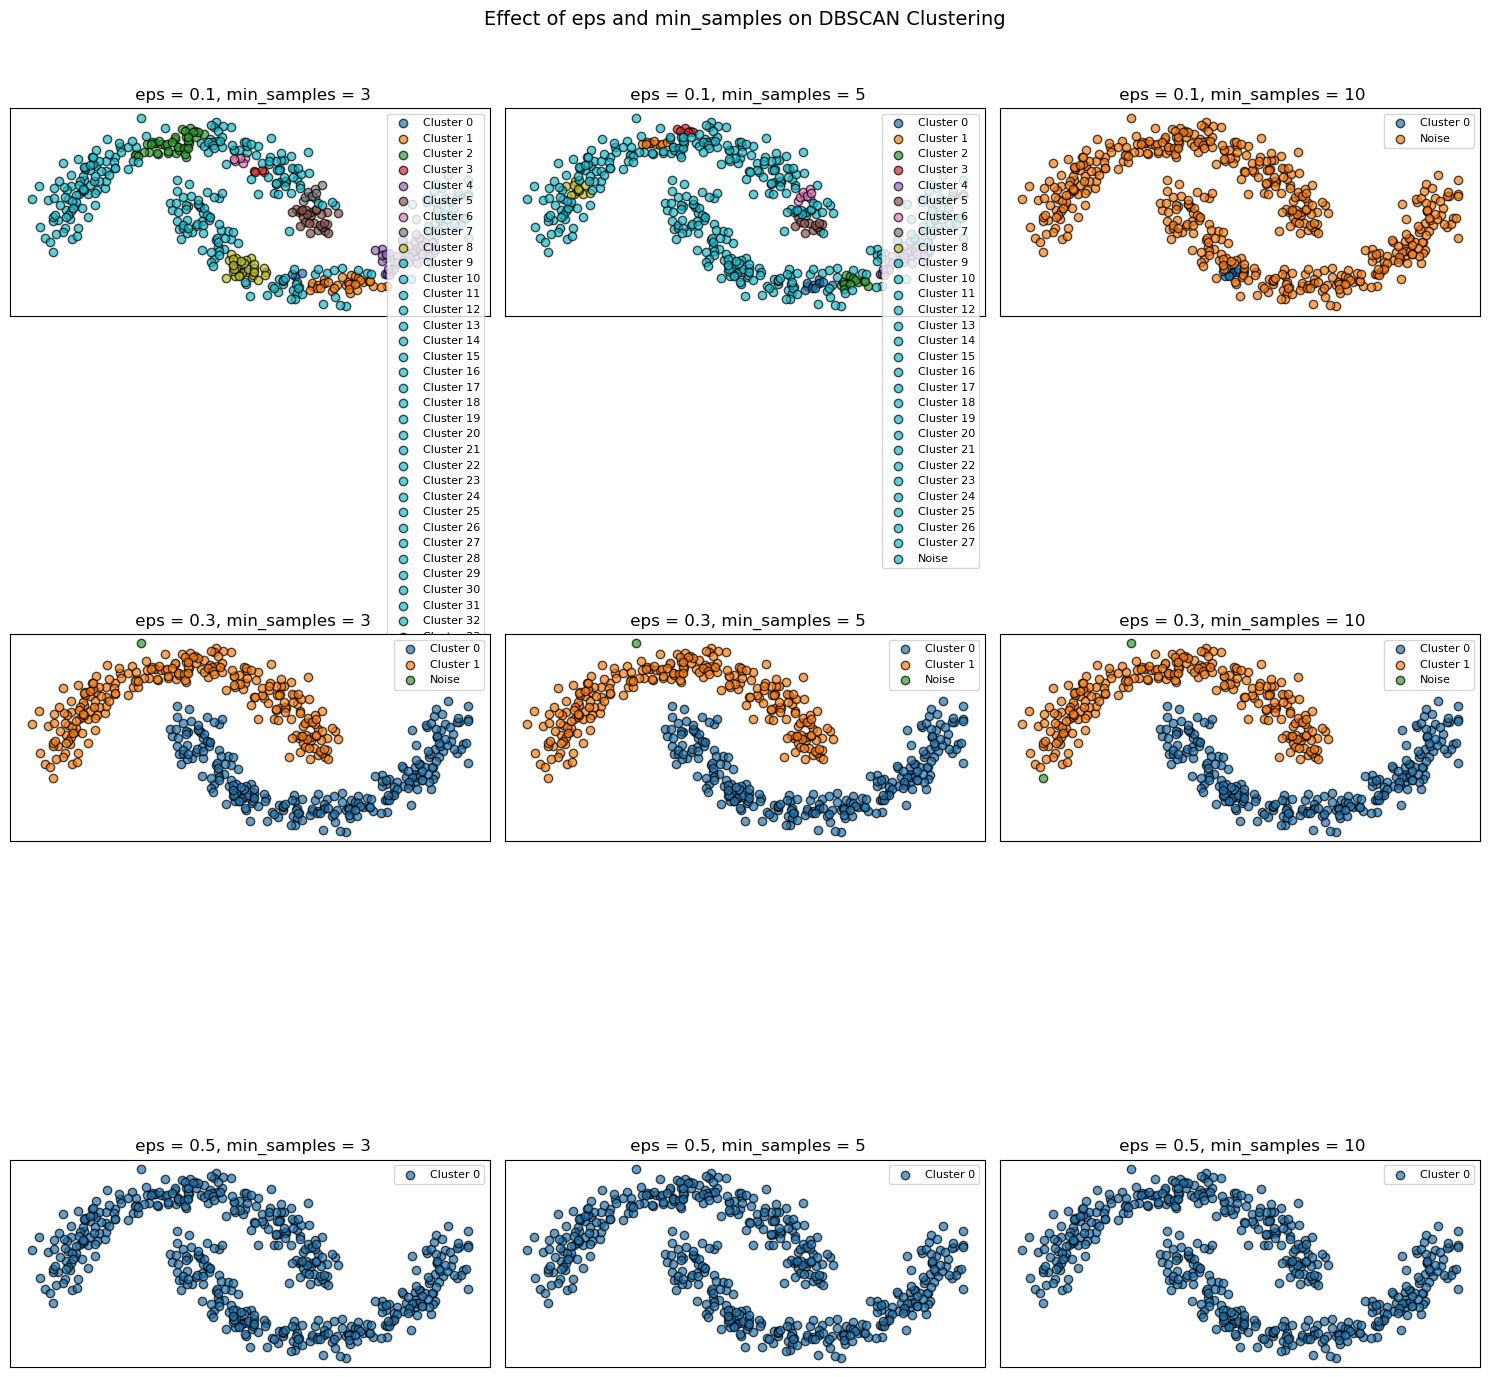

In [100]:
# Plot results for different parameter combinations

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15,14))

fig.suptitle('Effect of eps and min_samples on DBSCAN Clustering', fontsize=14)


for i , eps in enumerate(eps_values):

    for j , min_samples in enumerate(min_samples_values):

        dbscan =DBSCAN(eps=eps, min_samples=min_samples)

        labels = dbscan.fit_predict(X)


        unique_labels = set(labels)

        # cmap = plt.cm.get_cmap("tab10", len(unique_labels)) 
        # cmap = plt.colormaps["tab10"]
        cmap = plt.colormaps.get_cmap("tab10")




        ax = axes[i,j]

        for label in unique_labels:

            mask =(labels == label)

            color = cmap(label if label != -1 else len(unique_labels)-1)  # Assign color


            ax.scatter(X[mask,0],X[mask,1],
                       
                       label = f'Cluster {label}' if label != -1 else 'Noise',
                       alpha=0.7, edgecolors='k', c=[color])
            
        ax.set_title(f' eps = {eps}, min_samples = {min_samples}')

        ax.set_xticks([])

        ax.set_yticks([])

        ax.legend(fontsize=8, loc='upper right')



plt.tight_layout(rect=[0,0,1,0.96])

# fig.set_constrained_layout(True)


plt.show()

Expected Observations


Small eps → More noise points (cluster fragmentation)
Large eps → Merging of clusters, incorrect groupings
Low min_samples → Small clusters & outliers included
High min_samples → Some real clusters may disappear